In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
hbd = pd.read_csv('hotel_bookings_data.csv')
hbd.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [21]:
hbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [22]:
list_item = []
for col in hbd.columns :
    list_item.append([col, hbd[col].dtype, hbd[col].isna().sum(), 100*hbd[col].isna().sum()/len(hbd[col]), hbd[col].nunique(), hbd[col].unique()[:5]])
desc_hbd = pd.DataFrame(data=list_item, columns = 'Feature DataType Null NullPct UniqueNum UniqueSample'.split())
desc_hbd

,Feature,DataType,Null,NullPct,UniqueNum,UniqueSample
0,hotel,object,0,0.000000,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.000000,2,"[0, 1]"
2,lead_time,int64,0,0.000000,479,"[342, 737, 7, 13, 14]"
3,arrival_date_year,int64,0,0.000000,3,"[2017, 2018, 2019]"
4,arrival_date_month,object,0,0.000000,12,"[September, October, November, December, January]"
5,arrival_date_week_number,int64,0,0.000000,53,"[27, 28, 29, 30, 31]"
6,arrival_date_day_of_month,int64,0,0.000000,31,"[1, 2, 3, 4, 5]"
7,stays_in_weekend_nights,int64,0,0.000000,17,"[0, 1, 2, 4, 3]"
8,stays_in_weekdays_nights,int64,0,0.000000,35,"[0, 1, 2, 3, 4]"
9,adults,int64,0,0.000000,14,"[2, 1, 3, 4, 40]"


In [23]:
hbd.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [24]:
hbd.duplicated().sum()

33261

In [25]:
# Create new column 'total_guests' from the combination of 'adults', 'children', 'babies' columns
hbd['total_guests'] = hbd['adults'] + hbd['children'] + hbd['babies']
print('Data with 0 guest: {0} out of {1} all data'.format(hbd[hbd['total_guests'] == 0].shape[0], hbd.shape[0]))
# Create new column 'stay_duration' from the combination of 'stays_in_weekend_nights' and 'stays_in_weekdays_nights'
hbd['stay_duration'] = hbd['stays_in_weekend_nights'] + hbd['stays_in_weekdays_nights']
print('Data with 0 night: {0} out of {1} all data'.format(hbd[hbd['stay_duration'] == 0].shape[0], hbd.shape[0]))

Data with 0 guest: 180 out of 119390 all data
Data with 0 night: 715 out of 119390 all data


Observation :
* There are 119390 rows with 29 features the target feature is reservation_status
* There are nulls in children, city, agent and company features
* There are value called Undefined in meal feature
* There are 33261 duplicated rows
* There are unecessary values with 0 guests and 0 nights
* There are unecessary data type

Solution to these problems are :
* Drop 33261 duplicated rows
* Performing imputation for children, city, agent, and company features
* Change value Undifined to No Meal in meal feature
* Drop values with condition 0 guests and 0 nights
* Change datatype from float to integer

# Data Preprocessing

In [26]:
#Drop duplicated data
hbd.drop_duplicates(inplace=True)
print ('Total duplicated data after dropping:', hbd.duplicated().sum())

Total duplicated data after dropping: 0


In [27]:
# Handling null values
# Null values in 'children' feature could mean 0 children
hbd['children'] = hbd['children'].fillna(0)
# Null values in 'city' feature can be seen as Unknown city
hbd['city'] = hbd['city'].fillna('Unknown')
# According to the research paper attached to the dataset, null values in 'agent' and 'company' means the booking did not come from a travel agent. So, it can be replaced by 0, meaning 'Not applicable'. 
hbd['agent'] = hbd['agent'].fillna(0)
hbd['company'] = hbd['company'].fillna(0)
# Check null values again
hbd.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [28]:
# Fix the data type
hbd['children'] = hbd['children'].astype('int64')
hbd['agent'] = hbd['agent'].astype('int64')
hbd['company'] = hbd['company'].astype('int64')

In [29]:
# Fix incorrect value
# Replace 'Undefined' in 'meal' feature with 'No Meal'
hbd['meal'] = hbd['meal'].replace(['Undefined'], 'No Meal')
hbd['meal'].value_counts()

Breakfast     67088
No Meal        9896
Dinner         8798
Full Board      347
Name: meal, dtype: int64

In [30]:
# Remove unnecessary data with 0 guests and 0 nights
hbdc = hbd[(hbd['total_guests'] > 0) & (hbd['stay_duration'] > 0)].copy()

print('before pre-processing:', hbd.shape[0])
print('after pre-processing:', hbdc.shape[0])

before pre-processing: 86129
after pre-processing: 85374


In [31]:
hbd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86129 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86129 non-null  int64  
 11  babies                          86129 non-null  int64  
 12  meal                           

# Monthly Hotel Booking Analysis Based on Hotel Type

In [34]:
#Aggregation table for total booking hotel per month vs hotel classification
hbdc_agg = hbdc.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
hbdc_agg.columns = ['hotel_type','arrival_month','unique_year','total_booking']
hbdc_agg

,hotel_type,arrival_month,unique_year,total_booking
0,City Hotel,April,2,3514
1,City Hotel,August,2,4908
2,City Hotel,December,2,4009
3,City Hotel,February,2,2952
4,City Hotel,January,2,2849
5,City Hotel,July,2,5321
6,City Hotel,June,2,5017
7,City Hotel,March,2,2674
8,City Hotel,May,2,4777
9,City Hotel,November,2,4040


Unique year is the unique number for arrival_date_year which are 2017, 2018, 2019. For both hotel types, September and October were captured every year since 2017. Other months were captured from 2018. So, normalization for total_booking is required to make the values even.

In [35]:
# Normalization of data by calculating the average number of orders per month in different years
hbdc_agg['avg_total_booking'] = round(hbdc_agg['total_booking']/hbdc_agg['unique_year'])
hbdc_agg

,hotel_type,arrival_month,unique_year,total_booking,avg_total_booking
0,City Hotel,April,2,3514,1757.0
1,City Hotel,August,2,4908,2454.0
2,City Hotel,December,2,4009,2004.0
3,City Hotel,February,2,2952,1476.0
4,City Hotel,January,2,2849,1424.0
5,City Hotel,July,2,5321,2660.0
6,City Hotel,June,2,5017,2508.0
7,City Hotel,March,2,2674,1337.0
8,City Hotel,May,2,4777,2388.0
9,City Hotel,November,2,4040,2020.0


In [38]:
#Simplify month label
order_month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
hbdc_agg['month'] = hbdc_agg['arrival_month'].str[:3]
hbdc_agg['month'] = pd.Categorical(hbdc_agg['month'], categories = order_month, ordered = True)
hbdc_agg

,hotel_type,arrival_month,unique_year,total_booking,avg_total_booking,month
0,City Hotel,April,2,3514,1757.0,Apr
1,City Hotel,August,2,4908,2454.0,Aug
2,City Hotel,December,2,4009,2004.0,Dec
3,City Hotel,February,2,2952,1476.0,Feb
4,City Hotel,January,2,2849,1424.0,Jan
5,City Hotel,July,2,5321,2660.0,Jul
6,City Hotel,June,2,5017,2508.0,Jun
7,City Hotel,March,2,2674,1337.0,Mar
8,City Hotel,May,2,4777,2388.0,May
9,City Hotel,November,2,4040,2020.0,Nov


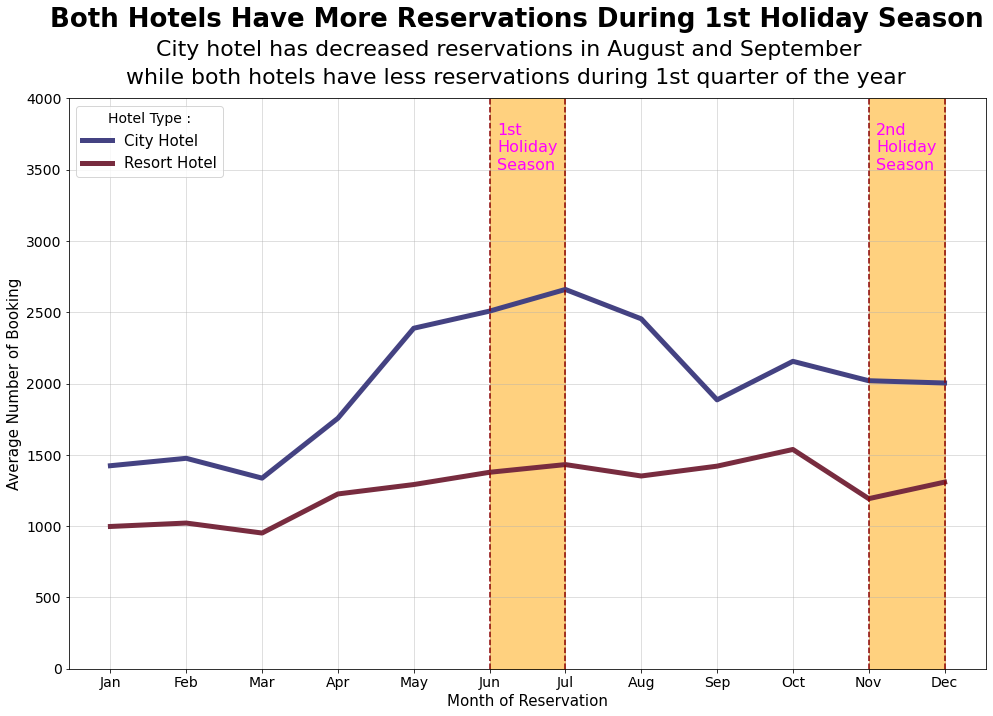

In [121]:
# Visualising average monthly hotel booking for both hotels
plt.figure(figsize=(15,10))
sns.lineplot(x='month', y='avg_total_booking', hue='hotel_type',
             size='hotel_type', sizes=(5, 5), data=hbdc_agg, palette='icefire')

plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(alpha=0.5)
plt.legend(title='Hotel Type :', title_fontsize=14, prop={'size':15}, fontsize='x-large')

plt.xlabel('Month of Reservation', fontsize=15)
plt.ylabel('Average Number of Booking', fontsize=15)
plt.ylim(0,4000)

plt.text(x=-0.8, y=4500, s='Both Hotels Have More Reservations During 1st Holiday Season', fontsize=26, fontweight='bold')
plt.text(x=0.6, y=4300, s='City hotel has decreased reservations in August and September', fontsize=22)
plt.text(x=0.2, y=4100, s='while both hotels have less reservations during 1st quarter of the year', fontsize=22)

plt.axvline(5, ls='--', color='darkred')
plt.axvline(6, ls='--', color='darkred')
plt.stackplot(np.arange(5,7,1),[[4000]], color='orange', alpha=0.5)
plt.text(x=5.1, y=3500, s='1st\nHoliday\nSeason', fontsize=16, color='magenta')

plt.axvline(10, ls='--', color='darkred')
plt.axvline(11, ls='--', color='darkred')
plt.stackplot(np.arange(10,12,1),[[4000]], color='orange', alpha=0.5)
plt.text(x=10.1, y=3500, s='2nd\nHoliday\nSeason', fontsize=16, color='magenta')

plt.tight_layout()
plt.savefig('visualize task 2 .png', dpi = 200)